## Ensemble learning

### 2.1 데이터셋 로드

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

#데이터셋 로드
##데이터 설명 : http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

#data set을 training set과 test set으로 분리
##test_size의 default=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X_train.shape, X_test.shape

((375, 2), (125, 2))

In [2]:
#데이터 셋 이해(데이터프레임생성, 시각화)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##데이터프레임 생성
X0, y0 = make_moons(n_samples=1000, noise=0, random_state=42)
X5, y5 = make_moons(n_samples=1000, noise=0.50, random_state=42)

df0 = pd.DataFrame(X0); df0['y'] = y0
df5 = pd.DataFrame(X5); df5['y'] = y5

df0.columns=['x1','x2','y']
df5.columns=['x1','x2','y']

In [3]:
df0.head()

,x1,x2,y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


In [ ]:
df5.head()

,x1,x2,y
0,-0.292257,0.748299,1
1,1.474549,-0.111086,1
2,0.578556,0.718712,1
3,-0.419246,-0.861720,1
4,-0.765547,0.570814,0


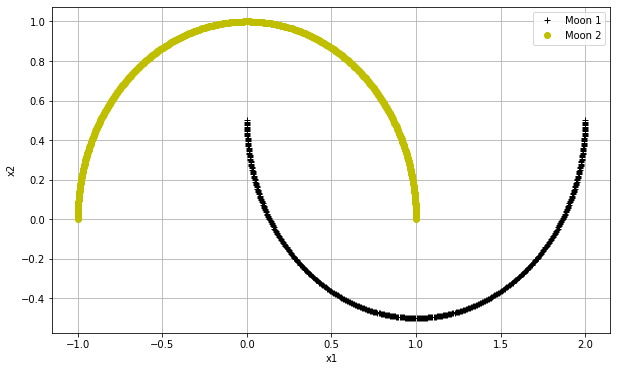

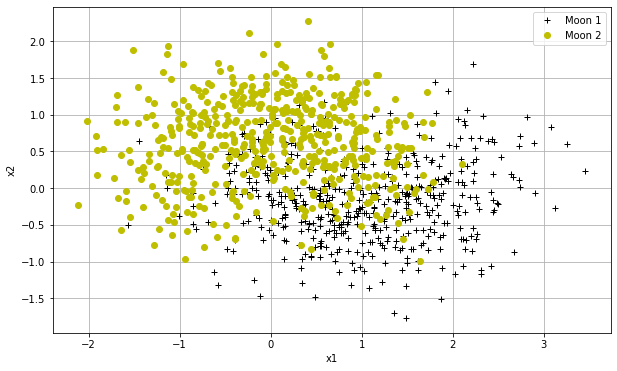

In [4]:
##데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(df0[df0['y']==1]['x1'],df0[df0['y']==1]['x2'],'k+',label='Moon 1')
plt.plot(df0[df0['y']==0]['x1'],df0[df0['y']==0]['x2'],'yo',label='Moon 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,6))
plt.plot(df5[df5['y']==1]['x1'],df5[df5['y']==1]['x2'],'k+',label='Moon 1')
plt.plot(df5[df5['y']==0]['x1'],df5[df5['y']==0]['x2'],'yo',label='Moon 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

### 2 배깅
#### 학습 데이터셋에서 랜덤하게 추출할 때, 중복을 허용하는 방식 (패스팅 = without replacement)
#### 하나의 알고리즘을 사용하지만 학습 데이터셋을 랜덤하게 여러번 추출하여 각각 다르게 학습함
#### 분류일 때는 최빈값을 예측 클래스로 예측하며, 회귀일 경우에는 각 분류기의 예측값의 평균을 계산하여 평균값을 예측값으로 한다.
- RandomForest

In [5]:
#분류나무 1개만 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.856


In [8]:
#분류나무 500개를 배깅하여 학습
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
## n_estimators : 다수결을 수행할 estimator의 개수.
## max_samples : 전체 데이터에서 몇 개(혹은 몇 %)를 사용할지
## n_jobs : 병렬처리(multi-processing)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.904


In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

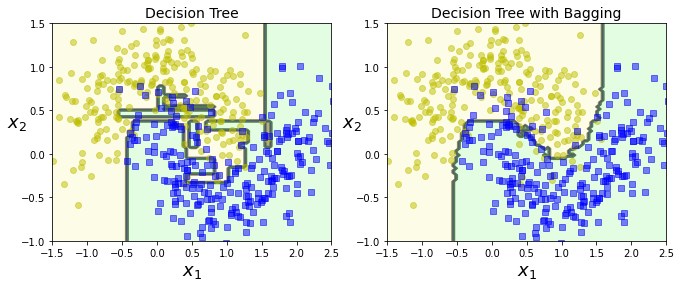

In [10]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging", fontsize=14)
plt.show()

### 랜덤포레스트

In [11]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

## Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

## BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## 두 모델의 예측 비교
print(np.sum(y_pred == y_pred_rf) / len(y_pred) *100 ,'% 동일한 예측을 한다')

97.6 % 동일한 예측을 한다


In [12]:
## 랜덤포레스트 특성 중요도
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


### 3 부스팅

#### 성능이 약한 학습기(weak learner)를 여러 개 연결하여 강한 학습기(strong learner)를 만드는 앙상블 학습

In [14]:
#에이다부스트 (AdaBoost)
#과소적합(underfitted)됐던 학습 데이터 샘플의 가중치를 높이면서 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합되도록 하는 방식

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

In [15]:
print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.896


![아다부스트](http://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F996E3A355B836F8019CC58)

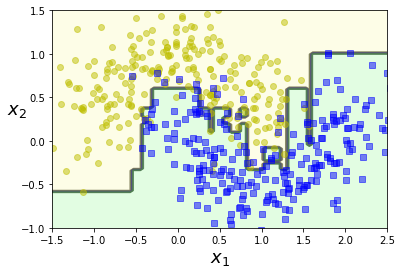

In [16]:
plot_decision_boundary(ada_clf, X, y)

### 그라디언트 부스팅

In [20]:
#그래디언트 부스팅(Gradient Boosting)
#아다부스트 처럼 학습단계 마다 데이터 샘플의 가중치를 업데이트 해주는 것이 아니라
#학습 전단계 모델에서의 잔여 오차(residual error)에 대해 새로운 모델을 학습시키는 방법
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100) # y = 3x^2+ 0.05 + noise

![그래디언트 부스트](http://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99AE553A5B8370021ECADB)

In [21]:
from sklearn.tree import DecisionTreeRegressor

#회귀분류나무 1번째
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
#회귀분류나무 2번째
y2 = y - tree_reg1.predict(X)  # residual errors
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)
#회귀분류나무 3번째
y3 = y2 - tree_reg2.predict(X)  # residual error
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

#X=0.8에 적합
X_new = np.array([[0.8]])  # new data
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print('y_pred :', y_pred)

y_pred : [0.75026781]


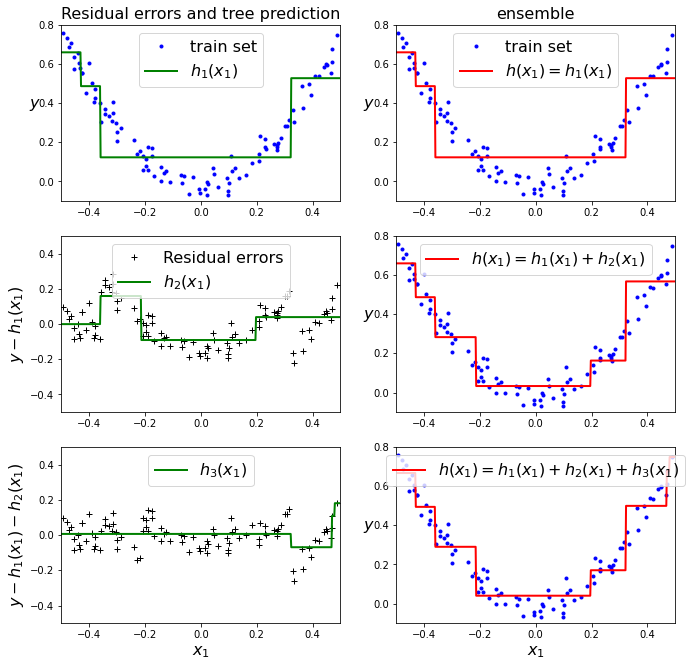

In [22]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residual errors and tree prediction", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="train set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("ensemble", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residual errors")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
#그래디언트 부스팅(모델 개수 3개)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X, y)

print('y_pred :', gbrt.predict(X_new))

#그래디언트 부스팅(모델 개수 200개)
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1, random_state=42)
gbrt_slow.fit(X, y)

print('y_pred :', gbrt_slow.predict(X_new))

y_pred : [0.75026781]
y_pred : [0.75026781]


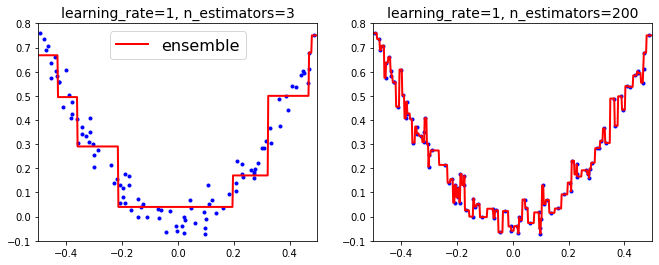

In [24]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="ensemble")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

### XGB, LGB

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [ ]:
data.shape

(506, 13)

In [ ]:
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

Max_Depth

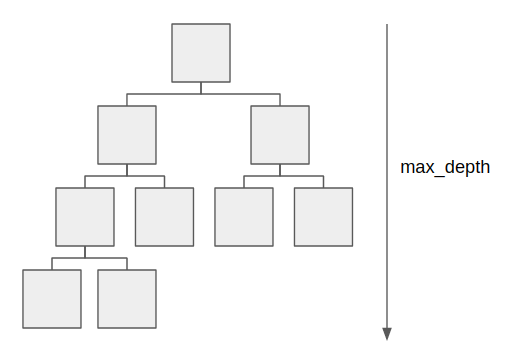

Col_Sample

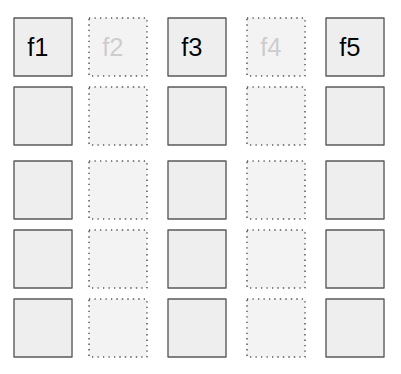

In [ ]:
params = {'max_depth' : 30,
         'eta' : 0.1, 
         'colsample_bytree' : 0.8,
         'objective' : 'reg:linear',
         'eval_metric' : 'mae'
         }
num_rounds = 1000
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds
                      , evals=wlist,early_stopping_rounds=10)

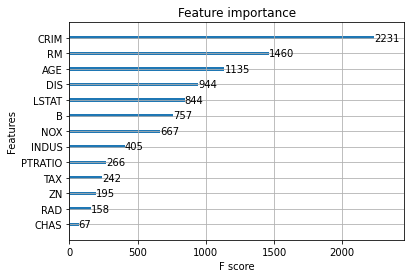

In [ ]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# Light GBM dataset
lgb_train = lgb.Dataset(X_train,  y_train)
lgb_test = lgb.Dataset(X_test,  y_test)

# train
params = {'max_depth' : 30,
         'learning_rate' : 0.1, 
          'colsample_bytree' : 0.8,
          'objective': 'regression_l1',
          }

lgb_model = lgb.train(params = params, train_set=lgb_train, num_boost_round=num_rounds, valid_sets=lgb_test,early_stopping_rounds=10)

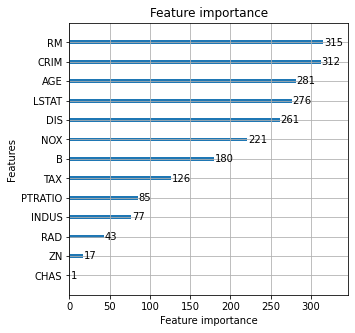

In [ ]:
lgb.plot_importance(lgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

덜 중요한 하이퍼파라미터<br>
http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/